# Practice Session 07: Connected components

*Introduction to Network Science* (2025/26), UPF

***Version 1***

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

# 1. The Star Wars graph

In [ ]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "starwars.graphml"

# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_in.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

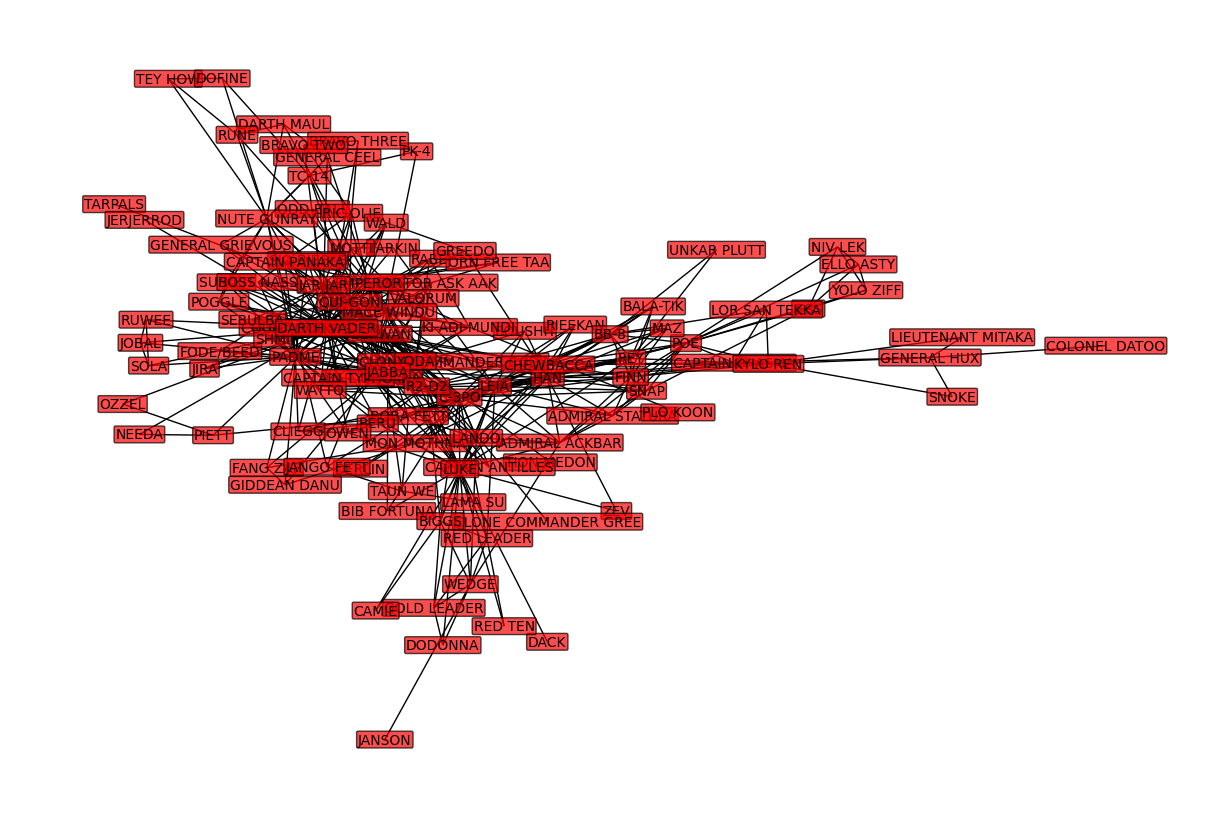

In [3]:
# LEAVE AS-IS (or modify slightly if you want) — we will reuse this function

def plot_graph(g):

    # Create a figure
    plt.figure(figsize=(12,8))

    # Layout the nodes using a spring model
    nx.draw_spring(
        g, 
        with_labels=True, font_size=10,     # Make labels, with label box defined below
        bbox=dict(facecolor="red", edgecolor='black', boxstyle='round,pad=0.1', alpha=0.7),
        node_size=0     # Hide nodes, leave only labels
    )

    # Display
    plt.show()

plot_graph(g)

In [4]:
print(nx.number_connected_components(g))

1


The above number shows that only 1 connected component exists, and as such, this whole graph must be connected

In [5]:
degrees = [d for n, d in g.degree()]
avg = statistics.mean(degrees)
med = statistics.median(degrees)

# Round to 1 decimal place
avg = round(avg, 1)
med = round(med, 1)

print("Average degree:", avg)
print("Median degree:", med)
print("Max degree:", max(degrees))

Average degree: 8.1
Median degree: 5.0
Max degree: 52


<font size="+1" color="red">Replace this cell with your answer to the following: 

- Is this a scale-free network? 
- Why or why not? 
- What would be the expected value of the standard deviation of the degree for an ER network with the same average degree?

</font>




The exact ER result (G(n,p)):

- p = avg / (n-1)
- Var(deg) = (n-1) p (1-p) = avg * (1 - avg/(n-1))
- Std(deg) = sqrt( avg * (1 - avg/(n-1)) )

For large n (so avg/(n-1) ≈ 0) this simplifies to the Poisson/large-n approximation:
- Std ≈ sqrt(avg) = sqrt(8.1) ≈ 2.846

Rounded to 1 decimal: 2.8.

## Poisson-esque degree distribution
The degree distribution follows a Poisson like shape, showing that it is likely to be

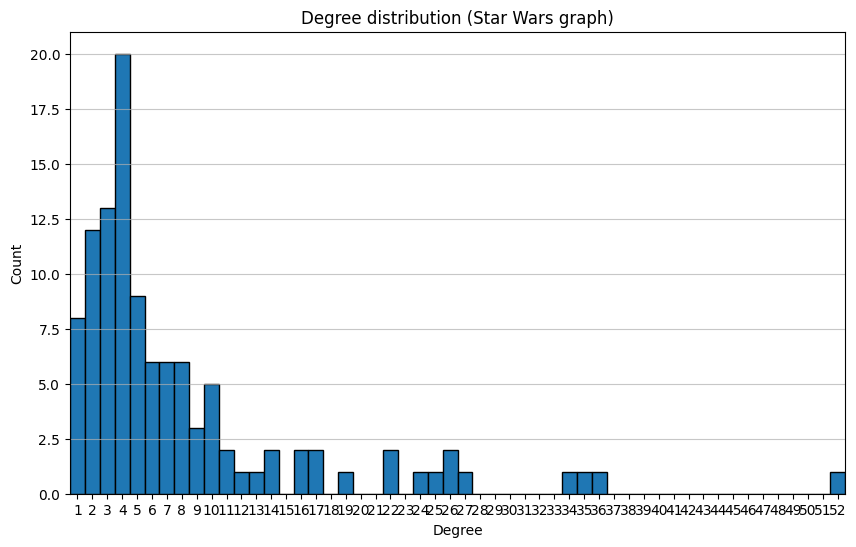

In [6]:
# Plot histogram of degree distribution
plt.figure(figsize=(10,6))
min_deg = min(degrees)
max_deg = max(degrees)
bins = np.arange(min_deg, max_deg + 2) - 0.5  # integer-centered bins
plt.hist(degrees, bins=bins, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution (Star Wars graph)')
plt.xticks(range(min_deg, max_deg + 1))
plt.xlim(min_deg - 0.5, max_deg + 0.5)
plt.grid(axis='y', alpha=0.7)
plt.show()

# 2. Remove a fraction of edges

In [7]:
# LEAVE AS-IS

def remove_edges_uniformly_at_random(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:

        # Remove one random edge
        edge = random.choice(list(g_out.edges()))

        if g_out.has_edge(edge[0], edge[1]):
            g_out.remove_edge(edge[0], edge[1])

    # Return the resulting graph
    return g_out

In [8]:
g15 = remove_edges_uniformly_at_random(g, 0.85) # Keep 15% of edges
g50 = remove_edges_uniformly_at_random(g, 0.50)
g85 = remove_edges_uniformly_at_random(g, 0.15) # Kep 85% of edges

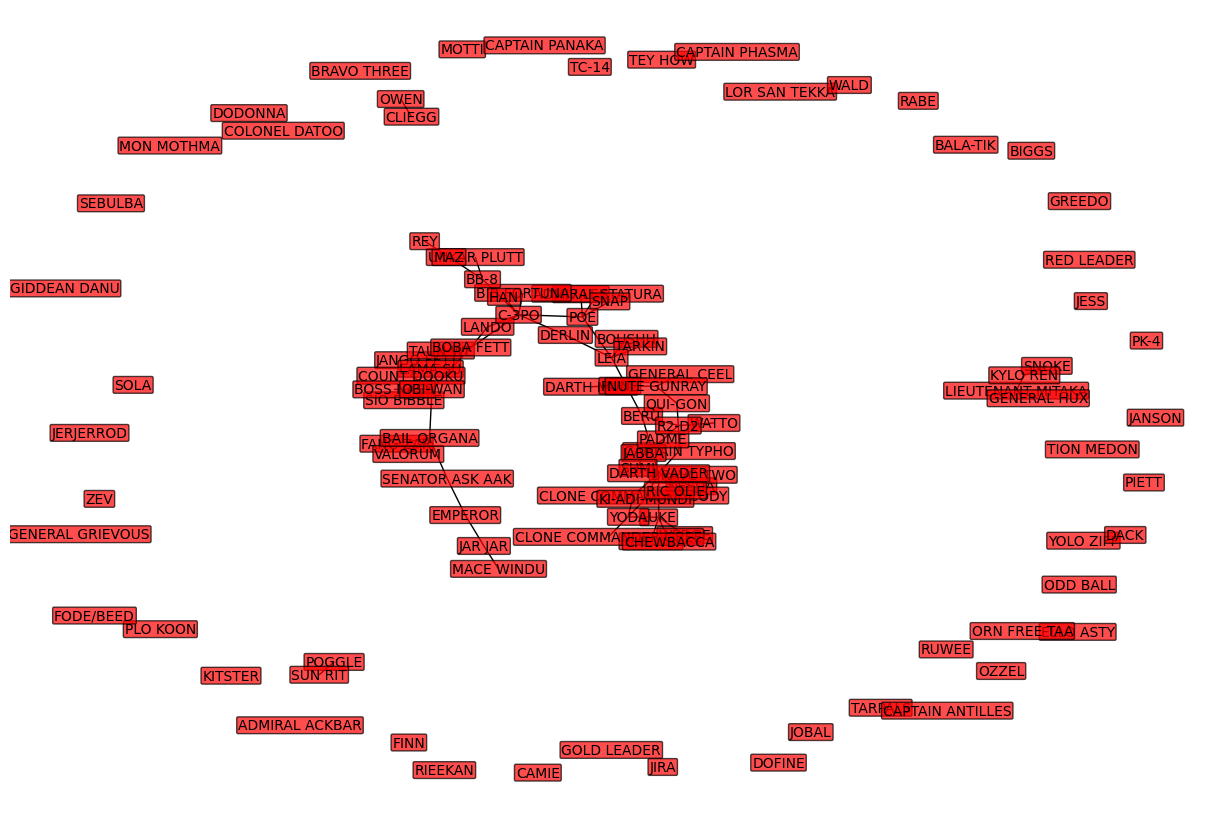

In [9]:
plot_graph(g15)

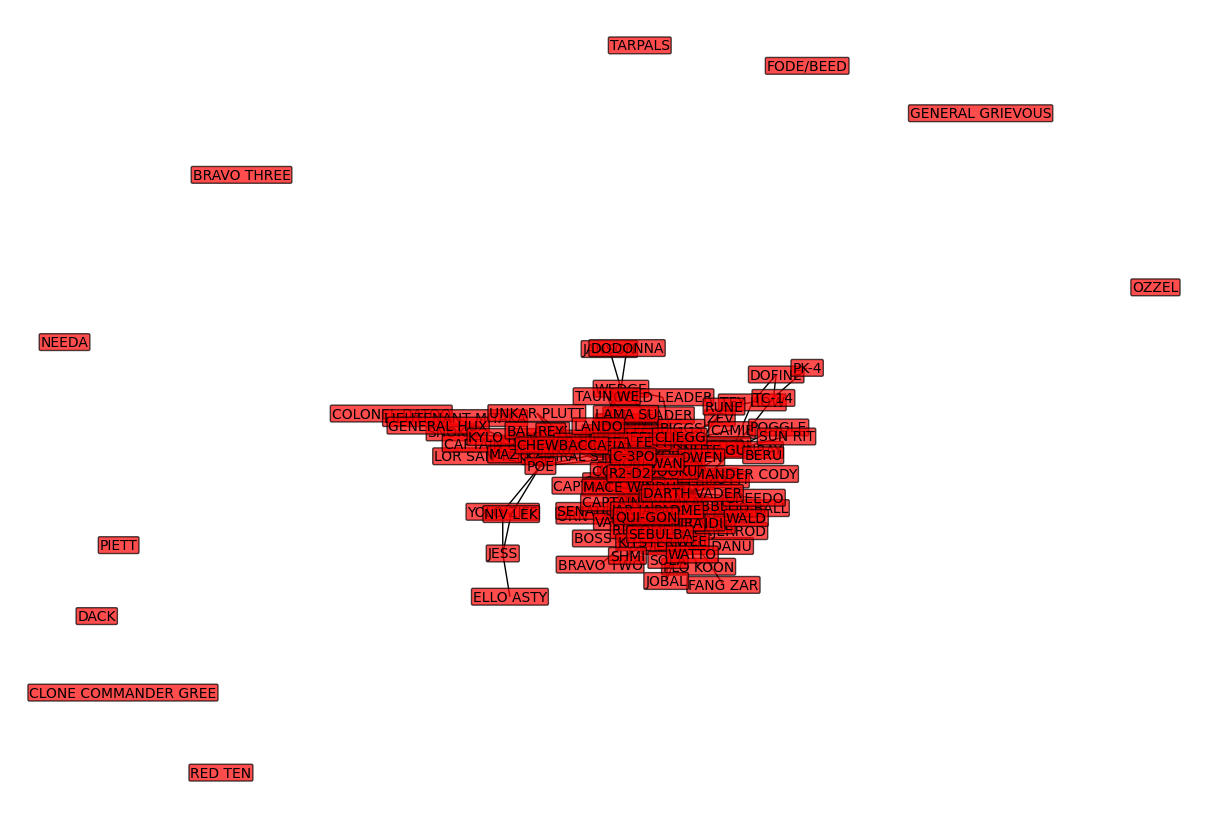

In [10]:
plot_graph(g50)

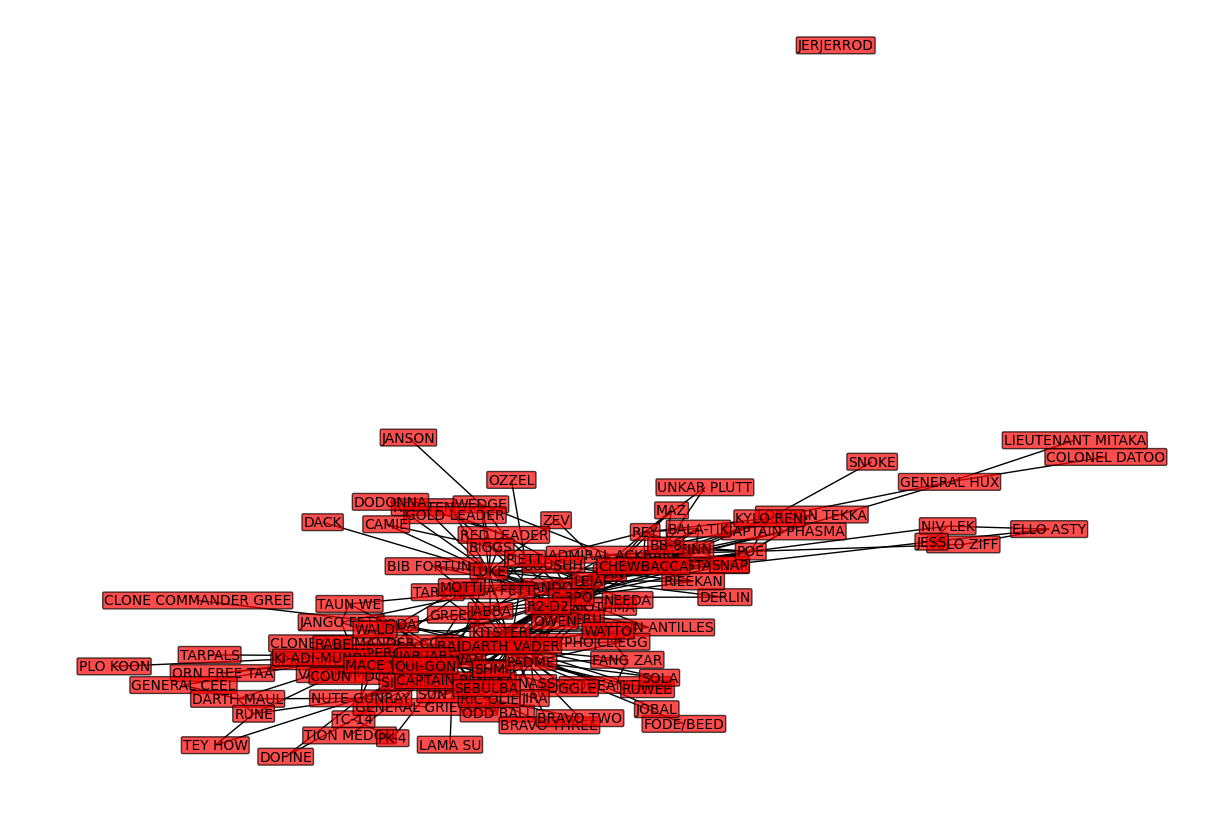

In [11]:
plot_graph(g85)

In [12]:
print("g15 has", nx.number_connected_components(g15), "connected components")
print("g50 has", nx.number_connected_components(g50), "connected components")
print("g85 has", nx.number_connected_components(g85), "connected components")

print("The number of nodes is", g.number_of_nodes())

print("The size of the largest connected component in g15 is ", len(max(nx.connected_components(g15), key=len)))
print("The size of the largest connected component in g50 is ", len(max(nx.connected_components(g50), key=len)))
print("The size of the largest connected component in g85 is ", len(max(nx.connected_components(g85), key=len)))

g15 has 51 connected components
g50 has 11 connected components
g85 has 2 connected components
The number of nodes is 110
The size of the largest connected component in g15 is  55
The size of the largest connected component in g50 is  100
The size of the largest connected component in g85 is  109


## Number connected components
As we remove more edges, we increase the number of connected components, since more clusters become isolated. It is easy to reason that as we tend towards removing all edges, the number of connected components will equal the number of nodes.

## Size of largest CC
As we remove more edges, the size of the largest connected component will decrease. Similarly, if we tend towards removing all edges, the size of the largest CC will tend towards 1.

In [13]:
# LEAVE AS-IS

def remove_edges_by_betweenness(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Compute edge betweenness
    edge_betweenness = nx.edge_betweenness_centrality(g_out)
    edges_by_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        edge_to_remove, betweenness = edges_by_betweenness.pop(0)
        g_out.remove_edge(*edge_to_remove)

    # Return the resulting graph
    return g_out

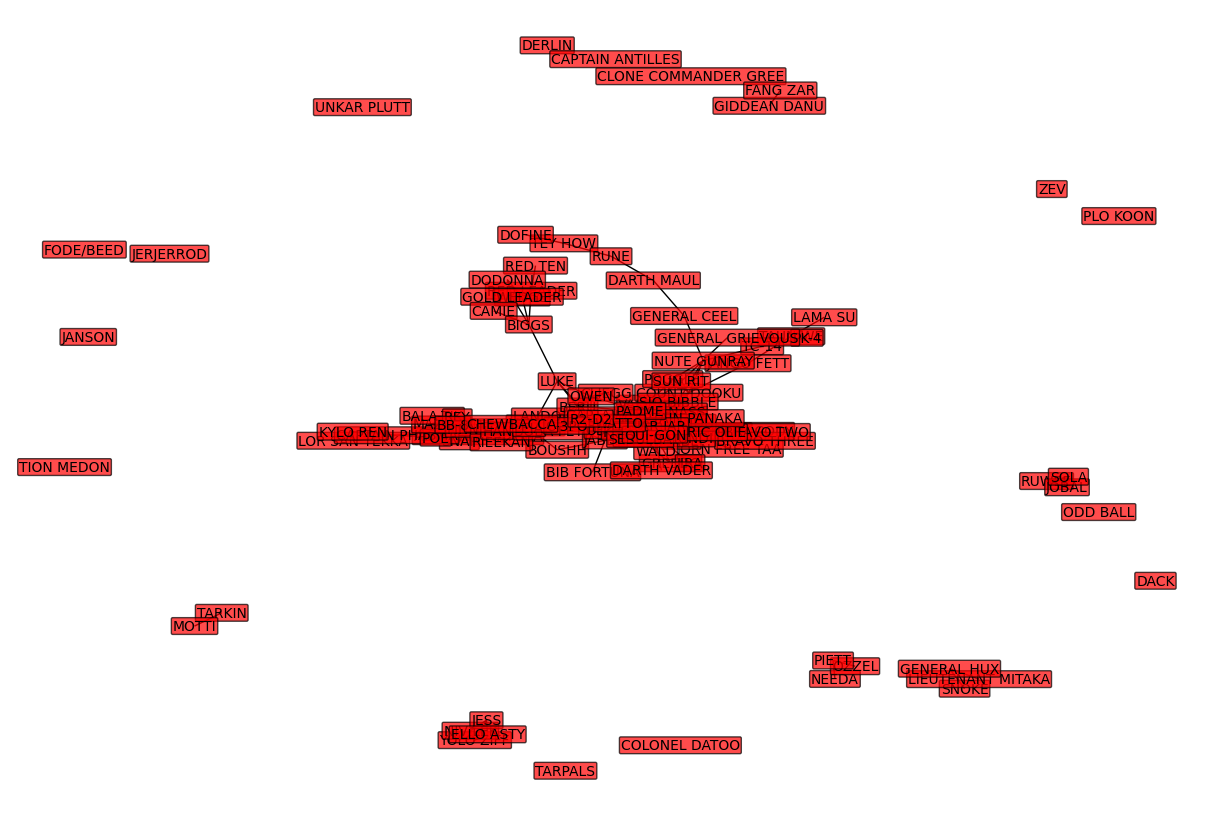

In [14]:
# LEAVE AS-IS

g50b = remove_edges_by_betweenness(g, 0.50)
plot_graph(g50b)

## Visual Obsesrvation

Purely going by visuals, it seems that reducing 50% of the highest betweenesss edges creates more connected components than by removing random edges. This makes sense since betweeness is a measure of connectivity, and by removing high-value edges, it will cut off more of the least connected nodes, isolating them into separate connected components. It makes sense that the betweeness removal will give more connected components (at least while p not close to 1, i.e. p<0.9)

# 3. Assigning connected components

In [15]:
def assign_component_recursive(g: nx.Graph, node2componentid: dict, starting_node, componentid: int):
    node2componentid[starting_node] = componentid # Assign component id to starting node
    for neighbour in g.neighbors(starting_node): # Gives iter over neighbours of node in graph
        if neighbour not in node2componentid:
            assign_component_recursive(g, node2componentid, neighbour, componentid)



In [16]:
def assign_components(g: nx.Graph)->dict:
    node2componentid = {}
    componentid = 1
    for node in g.nodes:
        if node not in node2componentid:
            assign_component_recursive(g, node2componentid, node, componentid)
            componentid += 1 # Must increment component id for next component
    return node2componentid # Expects a dict mapping node -> component id


In [17]:
# LEAVE AS-IS

# Test on cycle graph
cycle_components = assign_components(nx.cycle_graph(10))
for componentid in cycle_components.values():
    assert componentid == 1, "All nodes in cycle graph should belong to the same component, with ID 1."

# Test on caveman graph
caveman_components = assign_components(nx.caveman_graph(3, 3))
for componentid in caveman_components.values():
    assert componentid in [1, 2, 3], "Nodes in caveman graph should belong to one of three components (1, 2, or 3)."
    assert len([n for n, c in caveman_components.items() if c == componentid]) == 3, "There should be exactly 3 nodes assigned to each component in the caveman graph."

In [18]:
# LEAVE AS-IS

# Get component assignments of nodes using the function just defined
components_g50b = assign_components(g50b)

# Print component assignments
for character in ['LUKE', 'KYLO REN', 'SNOKE', 'PLO KOON'] :
    print(f"Character {character:<8} belongs to component {components_g50b[character]}")

Character LUKE     belongs to component 3
Character KYLO REN belongs to component 3
Character SNOKE    belongs to component 4
Character PLO KOON belongs to component 12


# 4. Number of connected components

In [19]:
def extract_connected_component_sizes(g: nx.Graph) -> dict:
    node2comp = assign_components(g)
    comp_sizes = {}
    for node, comp in node2comp.items():
        comp_sizes[comp] = comp_sizes.get(comp, 0) + 1
    return comp_sizes

In [20]:
components_sizes_g50b = extract_connected_component_sizes(g50b)

sizes = []
for vals in components_sizes_g50b.values():
    sizes.append(vals)

sizes.sort(reverse=True)

print("The largest components are ", sizes[:5])

The largest components are  [79, 4, 3, 3, 3]


In [21]:
def count_connected_components(g:nx.Graph) -> int:
    comp_sizes = extract_connected_component_sizes(g)
    return len(comp_sizes)

In [22]:
# LEAVE AS-IS

print(f"Number of connected components in graph g50b: {count_connected_components(g50b)}")

Number of connected components in graph g50b: 21


In [23]:
p_vals_gone = np.arange(0, 1, 0.02)

ncomponents_removing_by_betweenness = {}
ncomponents_removing_uniformly_at_random = {}

for p in p_vals_gone:
    g_p_btw = remove_edges_by_betweenness(g, p)
    g_p_rand = remove_edges_uniformly_at_random(g, p)

    ncomponents_removing_by_betweenness[p] = count_connected_components(g_p_btw)
    ncomponents_removing_uniformly_at_random[p] = count_connected_components(g_p_rand)


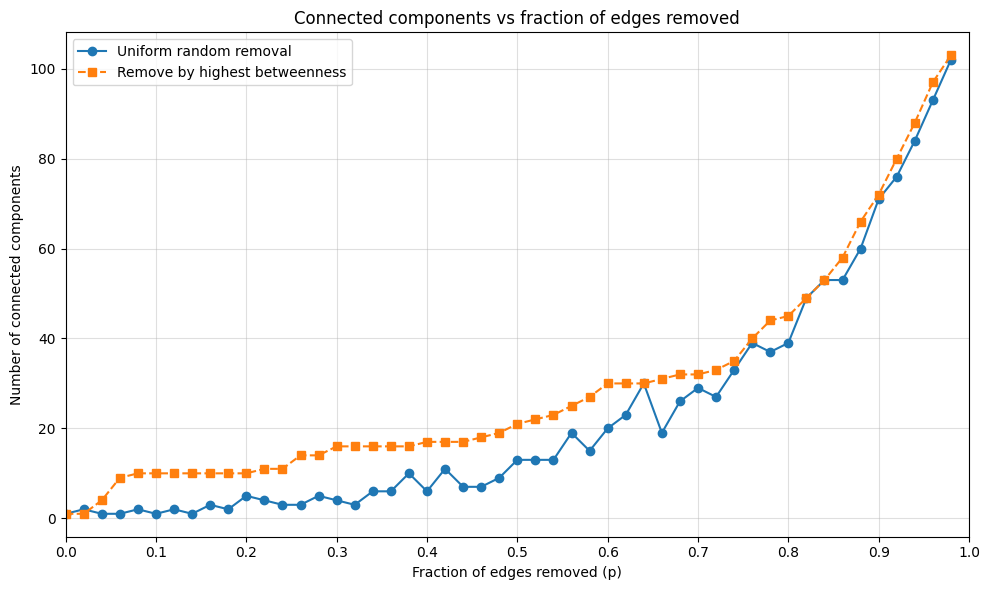

In [25]:
# Plot number of connected components vs fraction of edges removed
plt.figure(figsize=(10,6))

# x values (fractions of edges removed)
x = p_vals_gone

# y values for each removal strategy (make sure keys match float representation)
y_betweenness = [ncomponents_removing_by_betweenness.get(float(p), np.nan) for p in x]
y_random = [ncomponents_removing_uniformly_at_random.get(float(p), np.nan) for p in x]

plt.plot(x, y_random, marker='o', linestyle='-', color='C0', label='Uniform random removal')
plt.plot(x, y_betweenness, marker='s', linestyle='--', color='C1', label='Remove by highest betweenness')

plt.xlabel('Fraction of edges removed (p)')
plt.ylabel('Number of connected components')
plt.title('Connected components vs fraction of edges removed')
plt.xlim(0.0, 1.0)
plt.xticks(np.linspace(0, 1, 11))
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## Commentary
As expected and explained above, while p<0.9, more evidently when p<0.7, the betweeness removal pattern gives more connected components than random removal.
The trend is exponential, between 0.1 and 0.6, both patterns seem to average around 10-30 connected components, whilst after 0.6, the connected components number trends up towards the total number of nodes (also as explained before), giving a 1:1 ratio of connected components to number of nodes, as each node becomes its own component with no neighbours.

In [26]:
# Compute average number of connected components for random removal over 50 runs

n_runs = 50

# Initialize storage for runs
ncomponents_runs = {float(p): [] for p in p_vals_gone}

for i in range(n_runs):
    for p in p_vals_gone:
        g_p_rand = remove_edges_uniformly_at_random(g, float(p))
        n = count_connected_components(g_p_rand)
        ncomponents_runs[float(p)].append(n)

# Compute average (rounded to 1 decimal) for each p
ncomponents_removing_uniformly_at_random_avg = {
    p: round(float(np.mean(vals)), 1) for p, vals in ncomponents_runs.items()
}

# Prepare a list aligned with p_vals_gone for plotting
y_random_avg = [ncomponents_removing_uniformly_at_random_avg[float(p)] for p in p_vals_gone]

print(f"Computed average number of components over {n_runs} runs for {len(p_vals_gone)} p-values.")

Computed average number of components over 50 runs for 50 p-values.


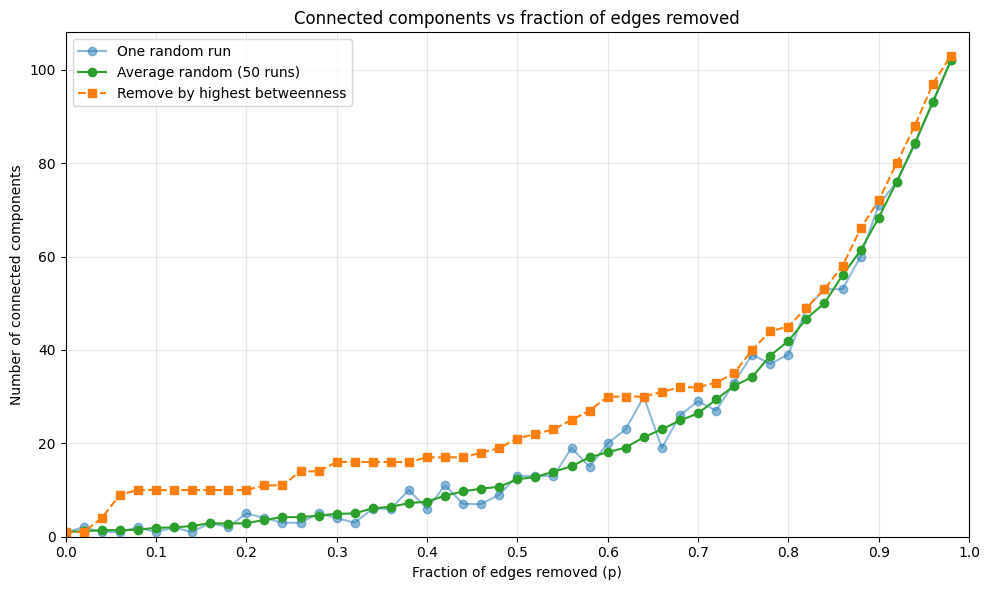

In [27]:
# Plot results: single random run, average over 50 random runs, and betweenness removal
plt.figure(figsize=(10,6))

x = p_vals_gone

plt.plot(x, y_random, marker='o', linestyle='-', color='C0', alpha=0.5, label='One random run')
plt.plot(x, y_random_avg, marker='o', linestyle='-', color='C2', label='Average random (50 runs)')
plt.plot(x, y_betweenness, marker='s', linestyle='--', color='C1', label='Remove by highest betweenness')

plt.xlabel('Fraction of edges removed (p)')
plt.ylabel('Number of connected components')
plt.title('Connected components vs fraction of edges removed')
plt.xlim(0.0, 1.0)
plt.xticks(np.linspace(0, 1, 11))
plt.ylim(0, max(max(y_betweenness), max(y_random), max(y_random_avg)) + 5)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

I have overlaid 1 random run with the average and highest betweeness.
As we can see, the average is much smoother than the random run and gives us a better idea of what the trend should more closely resemble. 
Here the random fluctuations are tempered, but still the reasoning of my previous evaluation remains that the highest betweeness removal leads in the number of connected components until the gap closes around 0.7

# Deliver your code, you must (individually)

A .zip file containing:

* This notebook.
* The `starwars.graphml` file.

<font size="-1" color="gray">(This cell, when delivering, remove.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>